# Fitting a line to Poisson data

In [1]:
%matplotlib inline
import octopus
from octopus import UniformPrior, PoissonPosterior, PoissonLikelihood
import numpy as np
import matplotlib.pyplot as pl

In [2]:
x = np.linspace(0, 5, 100)
def mean(m, b):
    return x * m + b
poisson_data = np.random.poisson(mean(2, 10))

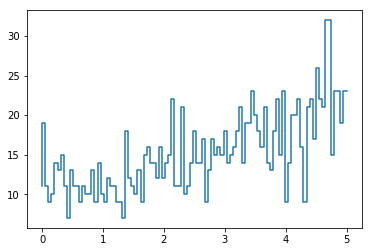

In [3]:
pl.step(x, poisson_data)

In [4]:
unif_prior = UniformPrior(0.5, 4) + UniformPrior(4, 16)

In [5]:
poisson_posterior = PoissonPosterior(poisson_data, mean, unif_prior)
poisson_likelihood = PoissonLikelihood(poisson_data, mean)

In [6]:
result_posterior = poisson_posterior.fit(x0=(1.5, 11))
result_posterior

 final_simplex: (array([[ 2.22321489,  9.65194533],
       [ 2.22319681,  9.6520397 ],
       [ 2.22317227,  9.65203177]]), array([-2652.55916801, -2652.55916801, -2652.55916801]))
           fun: -2652.5591680149009
       message: 'Optimization terminated successfully.'
          nfev: 70
           nit: 36
        status: 0
       success: True
             x: array([ 2.22321489,  9.65194533])

In [7]:
result_likelihood = poisson_likelihood.fit(x0=(1.5, 11))
result_likelihood

 final_simplex: (array([[ 2.22321489,  9.65194533],
       [ 2.22319681,  9.6520397 ],
       [ 2.22317227,  9.65203177]]), array([-2656.29683763, -2656.29683763, -2656.29683763]))
           fun: -2656.2968376331842
       message: 'Optimization terminated successfully.'
          nfev: 70
           nit: 36
        status: 0
       success: True
             x: array([ 2.22321489,  9.65194533])

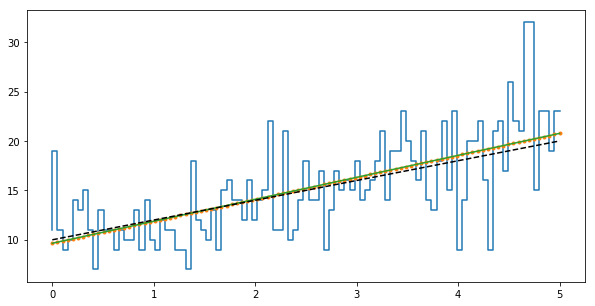

In [8]:
pl.figure(figsize=[10, 5])
pl.step(x, poisson_data)
pl.plot(x, mean(*result_posterior.x), '.')
pl.plot(x, mean(*result_likelihood.x))
pl.plot(x, mean(2, 10), 'k--')

In [9]:
import emcee
ndim, nwalkers = 2, 100
p0 = [result_posterior.x + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]

In [10]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, lambda params: - poisson_posterior.evaluate(params))
sampler.run_mcmc(p0, 5000)

(array([[  2.5498948 ,   9.28270933],
        [  2.66952641,   8.38180856],
        [  1.65735116,  11.34251433],
        [  1.86945261,  10.49477369],
        [  2.23762521,   9.50734086],
        [  2.34940146,   9.92651649],
        [  2.16200434,   9.94746343],
        [  2.55268968,   8.88841514],
        [  2.21785239,   9.93113346],
        [  2.09510261,   9.87070261],
        [  1.68424467,  11.50325725],
        [  2.15691541,  10.00531843],
        [  2.48757808,   8.83737568],
        [  2.23019736,   9.45471444],
        [  1.92474427,  10.19500536],
        [  2.0145917 ,  10.45915321],
        [  2.0845287 ,  10.30387251],
        [  2.02921079,   9.97445552],
        [  2.23892828,   9.9845997 ],
        [  2.32776412,   9.22113053],
        [  2.43455779,   8.79214565],
        [  2.26750325,   9.63538964],
        [  2.23641509,   9.88038822],
        [  1.64686428,  10.86713348],
        [  2.28436446,   8.80117056],
        [  2.44238609,   9.21738263],
        [  1

In [11]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))
samples.shape

(495000, 2)

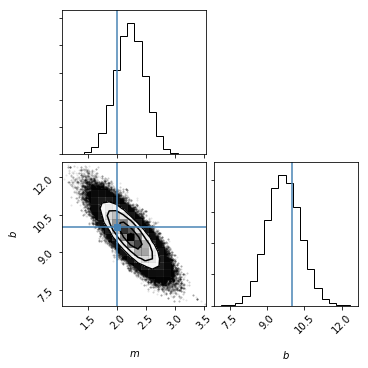

In [12]:
import corner
fig = corner.corner(samples, labels=["$m$", "$b$"],
                    truths=[2, 10])

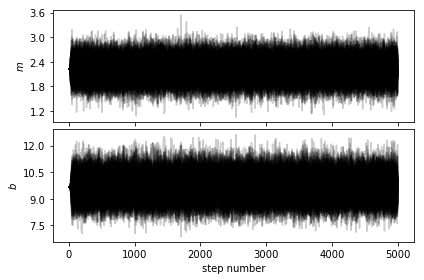

In [13]:
from matplotlib.ticker import MaxNLocator
label = [r"$m$", r"$b$"]

fig, axes = pl.subplots(2, 1, sharex=True)
for i in range(0, 2, 1):
    axes[i].plot(sampler.chain[:, :, i].T, color="k", alpha=0.2)
    axes[i].yaxis.set_major_locator(MaxNLocator(5))
    axes[i].set_ylabel(label[i])

axes[1].set_xlabel("step number")
fig.tight_layout(h_pad=0.0)

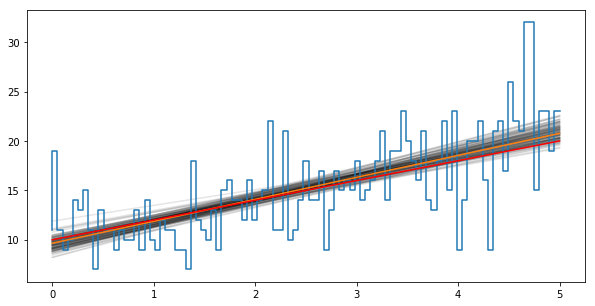

In [14]:
pl.figure(figsize=[10, 5])
xl = np.array([0, 5])
for m, b in samples[np.random.randint(len(samples), size=100)]:
    pl.plot(xl, m*xl+b, color="k", alpha=0.1)
pl.step(x, poisson_data)
pl.plot(x, mean(*result_posterior.x), '-')
pl.plot(x, mean(2, 10), 'r-')